Notebook notes

1. Plots trajectory examples: 
    
    a) sliced trajectory (from slice onset to trigger activation)

    b) whole trajectory (from trial start to trial end)

    c) interim trajectory (from previous trial trigger activation to current trial slice onset)

2. Tests occupancy/strategy functions calculating:
    
    a) percentage of interim trajectory in given 'centre-strategy' circle - default radius: 14 leaves a strip around the octagon walls; I guess the size of the strip/circle is kind of arbitrary, depends how strict you want to be

    b) distance travelled during the interim time as sum of Euclidean distances

3. Assignment:

    centre occupancy percentage and distance travelled outcomes are assigned to each player (pseudonym) and added to the individual analyses table 

Functions and imports

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


Imports with autoreload

In [16]:
%load_ext autoreload
%autoreload 2

import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import matplotlib as mpl
import analysis.trajectory_efficiency as trajectory_efficiency
import pandas as pd
import numpy as np
import parse_data.prepare_data as prepare_data
import parse_data.identify_filepaths as identify_filepaths
import analysis.conditioned_player_choice as conditioned_player_choice
import prepare_questionnaire_data
import data_extraction.get_indices as get_indices
import globals

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Define data folder and eprsonal data file

In [4]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/pseudonymised_json_files'
personal_data_csv = '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/questionnaire_data/personal_data.csv'

Get social and solo filenames (solos ordered by pseudonym, neither ordered by date)

In [5]:
social_files, ordered_solos = identify_filepaths.get_filenames(data_folder=data_folder)

Separate first and second solos into lists

In [6]:
first_solos = ordered_solos[::2]
second_solos = ordered_solos[1::2]

Prepare data and get trial lists

In [7]:
df_solos, solos_lists = prepare_data.prepare_data(data_folder, ordered_solos, combine=False)
df_socials, social_lists = prepare_data.prepare_data(data_folder, social_files, combine=False)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/pseudonymised_json_files/250417_1/2025-04-17_12-09-51_CY17_FirstSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/pseudonymised_json_files/250417_1/2025-04-17_12-46-27_CY17_SecondSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/pseudonymised_json_files/250417_1/2025-04-17_12-10-56_RL17_FirstSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/pseudonymised_json_files/250417_1/2025-04-17_12-46-05_RL17_SecondSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/pseudonymised_json_files/241112_2/2024-11-12_15-13-34_FA12_FirstSolo.json
Loading complete.
Preprocessin

Occupancy analyses:
- Return to centre vs stay close to walls strategy
    - location within circle from octagon centre
- How much a player shifts position from position at the end of previous trial
    - distance travelled for the interim trajectory
- Assign % in circle bounds to pseudonym
- Assign distance travelled while waiting for next trial to pseudonym

In [438]:
trial_list = social_lists[49]
trial = trial_list[90]
this_trial = plot_trajectory.extract_trial(trial, trial_list, 90)

In [413]:
flip_rotated_trial = flip_rotate_trajectories.flip_rotate_trajectories(trial_list=trial_list, trial_index=51)

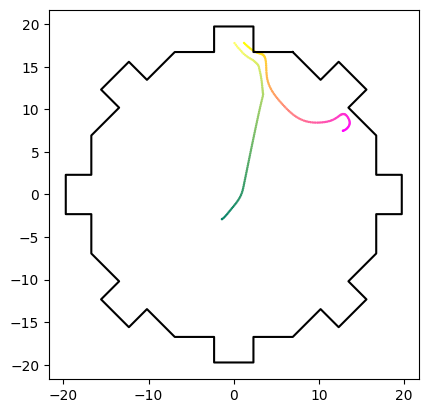

In [445]:
ax = plot_octagon.plot_octagon()
ax = plot_trajectory.plot_trial_trajectory_colour_map(ax, trial_list=trial_list, trial_index=101, cmap_winner=mpl.cm.spring, cmap_loser=mpl.cm.summer, s=0.5, trial=None)


In [182]:
# testing for solos
trial_list_solo = solos_lists[40]
solo_trial = trial_list_solo[20]
this_solo_trial = plot_trajectory.extract_trial(solo_trial, trial_list_solo, 20)
flip_rotated_solo_trial = flip_rotate_trajectories.flip_rotate_trajectories(trial_list=trial_list_solo, trial_index=20)

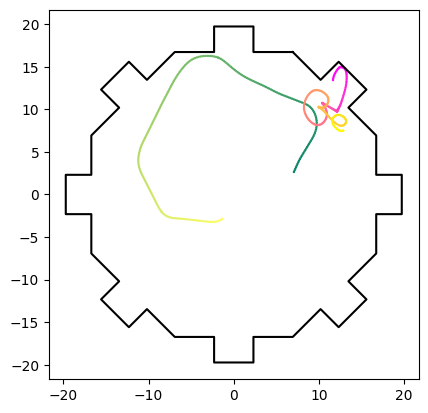

In [446]:
ax = plot_octagon.plot_octagon()
ax = plot_trajectory.plot_interim_trajectory_colour_map(ax, trial_list=trial_list, trial_index=101, cmap_winner=mpl.cm.spring, cmap_loser=mpl.cm.summer, s=0.5, trial=None)

<Axes: >

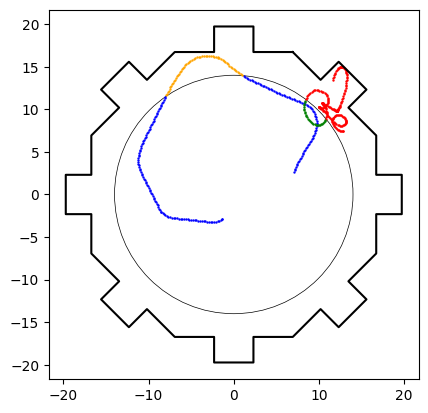

In [448]:
occupancy_and_strategy.plot_trajectory_with_circle(trial_list=trial_list, trial=trial_list[101], trial_index=101, radius=14, num_players=2)


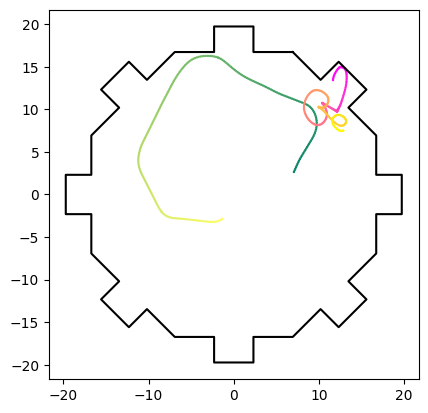

In [452]:
ax = plot_octagon.plot_octagon()
coordinate_arrays, ax = plot_trajectory.plot_interim_trajectory_colour_map(ax, trial_list=trial_list, trial_index=101, cmap_winner=mpl.cm.spring, cmap_loser=mpl.cm.summer, s=0.5, trial=None, plot=True)

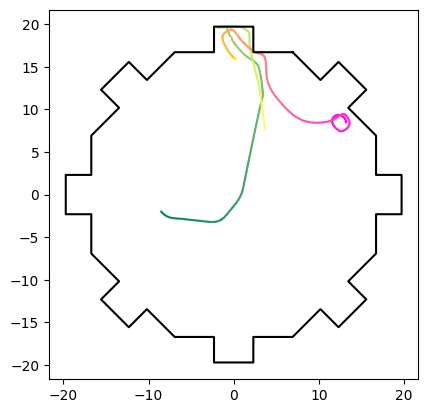

In [453]:

ax = plot_octagon.plot_octagon()
ax = plot_trajectory.plot_whole_trial_trajectory_colour_map(ax, trial_list=trial_list, trial_index=101, cmap_winner=mpl.cm.spring, cmap_loser=mpl.cm.summer, s=0.5, trial=None)

In [167]:
import occupancy_and_strategy

for trial_index in range(1,len(trial_list)):
    percentages = occupancy_and_strategy.percent_trajectory_in_circle(trial_list=trial_list, trial_index=trial_index, radius=14, num_players=2)
    print(percentages)

[np.float64(100.0), np.float64(0.0)]
[np.float64(100.0), np.float64(0.0)]
[np.float64(100.0), np.float64(0.0)]
[np.float64(100.0), np.float64(0.0)]
[np.float64(79.00763358778626), np.float64(13.740458015267176)]
[np.float64(76.55172413793103), np.float64(0.0)]
[np.float64(80.15463917525774), np.float64(0.0)]
[np.float64(77.19298245614034), np.float64(0.0)]
[np.float64(77.97101449275362), np.float64(0.0)]
[np.float64(79.06137184115524), np.float64(0.0)]
[np.float64(100.0), np.float64(0.0)]
[np.float64(83.64116094986808), np.float64(0.0)]
[np.float64(70.6713780918728), np.float64(0.0)]
[np.float64(82.42424242424242), np.float64(16.969696969696972)]
[np.float64(79.42122186495176), np.float64(0.0)]
[np.float64(80.70739549839229), np.float64(0.0)]
[np.float64(81.76100628930818), np.float64(0.0)]
[np.float64(84.24242424242424), np.float64(10.606060606060606)]
[np.float64(98.9247311827957), np.float64(0.0)]
[np.float64(18.29268292682927), np.float64(0.0)]
[np.float64(18.305084745762713), np.f

In [184]:
for trial_index in range(1,len(trial_list_solo)):
    percentages_solo = occupancy_and_strategy.percent_trajectory_in_circle(trial_list=trial_list_solo, trial_index=trial_index, radius=14, num_players=1)
    print(percentages_solo)

[np.float64(58.659217877094974)]
[np.float64(72.45762711864407)]
[np.float64(19.502074688796682)]
[np.float64(26.72413793103448)]
[np.float64(27.56183745583039)]
[np.float64(32.93768545994065)]
[np.float64(85.63685636856368)]
[np.float64(84.07821229050279)]
[np.float64(82.95819935691318)]
[np.float64(79.5539033457249)]
[np.float64(83.33333333333334)]
[np.float64(83.23170731707317)]
[np.float64(83.33333333333334)]
[np.float64(79.62962962962963)]
[np.float64(80.22813688212928)]
[np.float64(85.6763925729443)]
[np.float64(86.23376623376623)]
[np.float64(83.48909657320873)]
[np.float64(84.4574780058651)]
[np.float64(79.85611510791367)]
[np.float64(82.29166666666666)]
[np.float64(85.05154639175258)]
[np.float64(80.08298755186722)]
[np.float64(84.40111420612814)]
[np.float64(86.23595505617978)]
[np.float64(80.0)]
[np.float64(80.92307692307692)]
[np.float64(85.6)]
[np.float64(84.57142857142857)]
[np.float64(83.0246913580247)]
[np.float64(83.75350140056022)]
[np.float64(42.93948126801153)]
[np.

In [152]:
percentages_solo

[np.float64(0.0)]

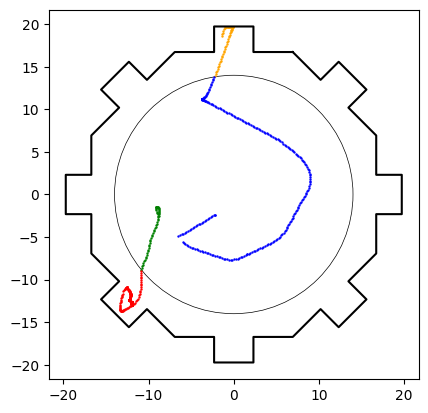

In [ ]:
ax = occupancy_and_strategy.plot_trajectory_with_circle(trial_list=trial_list, trial=None, trial_index=14, radius=14)
# winner is green and red

In [132]:
distances_travelled = occupancy_and_strategy.distance_travelled_in_iti(trial_list=trial_list, trial=None, trial_index=14, num_players=2)


In [133]:
distances_travelled

[np.float64(53.76553707584839), np.float64(20.834771070725814)]

Collecting occupancy and strategy for all trials across all trial lists

In [218]:
social_percentages = {}
for trial_list_index in range(len(social_lists)):
    social_percentages[trial_list_index] = []
    trial_list = social_lists[trial_list_index]
    for trial_index in range(1,len(trial_list)):
        percentages = occupancy_and_strategy.percent_trajectory_in_circle(trial_list=trial_list, trial_index=trial_index, radius=14, num_players=2)
        social_percentages[trial_list_index].append(percentages)

In [233]:
social_distances_travelled = {}
for trial_list_index in range(len(social_lists)):
    social_distances_travelled[trial_list_index] = []
    trial_list = social_lists[trial_list_index]
    for trial_index in range(1,len(trial_list)):
        distances_travelled = occupancy_and_strategy.distance_travelled_in_iti(trial_list=trial_list, trial=None, trial_index=trial_index, num_players=2)
        social_distances_travelled[trial_list_index].append(distances_travelled)

In [252]:
# combined solos
combined_solos = []

for trial_list_idx in range(0, len(solos_lists), 2):

    # concatenate the trial lists for the 2 solos of this session
    trial_list_combined = solos_lists[trial_list_idx] + solos_lists[trial_list_idx + 1]

    combined_solos.append(trial_list_combined)

In [278]:
solo_percentages = {}
for trial_list_index in range(len(solos_lists)):
    solo_percentages[trial_list_index] = []
    trial_list = solos_lists[trial_list_index]
    for trial_index in range(1,len(trial_list)):
        percentage = occupancy_and_strategy.percent_trajectory_in_circle(trial_list=trial_list, trial_index=trial_index, radius=14, num_players=1)
        print(f"percentage for trial list {trial_list_index} and trial {trial_index} is {percentage}")
        solo_percentages[trial_list_index].append(percentage)

percentage for trial list 0 and trial 1 is [np.float64(71.29629629629629)]
percentage for trial list 0 and trial 2 is [np.float64(82.85714285714286)]
percentage for trial list 0 and trial 3 is [np.float64(78.03030303030303)]
percentage for trial list 0 and trial 4 is [np.float64(69.7406340057637)]
percentage for trial list 0 and trial 5 is [np.float64(78.32167832167832)]
percentage for trial list 0 and trial 6 is [np.float64(75.1336898395722)]
percentage for trial list 0 and trial 7 is [np.float64(77.40963855421687)]
percentage for trial list 0 and trial 8 is [np.float64(81.52866242038218)]
percentage for trial list 0 and trial 9 is [np.float64(72.50755287009063)]
percentage for trial list 0 and trial 10 is [np.float64(81.25)]
percentage for trial list 0 and trial 11 is [np.float64(64.453125)]
percentage for trial list 0 and trial 12 is [np.float64(80.28169014084507)]
percentage for trial list 0 and trial 13 is [np.float64(84.26395939086294)]
percentage for trial list 0 and trial 14 is

In [282]:
# solo percentages need previous trial and current trial so have to be computed for solo sessions separately
# combining percentages into a single list after for first and second solos
combined_solo_percentages = []

for index in range(0,len(solo_percentages),2):
    combined_percentages = solo_percentages[index] + solo_percentages[index + 1]

    combined_solo_percentages.append(combined_percentages)

In [307]:
solo_distances_travelled = {}
for trial_list_index in range(len(solos_lists)):
    solo_distances_travelled[trial_list_index] = []
    trial_list = solos_lists[trial_list_index]
    for trial_index in range(1,len(trial_list)):
        distances_travelled = occupancy_and_strategy.distance_travelled_in_iti(trial_list=trial_list, trial=None, trial_index=trial_index, num_players=1)
        solo_distances_travelled[trial_list_index].append(distances_travelled)

In [337]:
combined_solo_distances_travelled = []

for index in range(0,len(solo_distances_travelled),2):
    combined_distances = solo_distances_travelled[index] + solo_distances_travelled[index + 1]

    combined_solo_distances_travelled.append(combined_distances)

Identity assignment

Social pseudonyms

In [185]:
import re
pseudo_tuples_list = []
experiment_dates_socials = []
for file in social_files:
     # match the session number and the pseudonym string
    match = re.search(r'(\d+_\d)[/\\](\d{4}-\d{2}-\d{2})_(\d{2}-\d{2}-\d{2})_(.*?_.*?)_Social\.json', file)
    if match:
        session, date, time, pseudonyms = match.groups()
        pseudo_tuples = pseudonyms.split('_')[0::]
        pseudo_tuples_list.append(pseudo_tuples)
        experiment_dates_socials.append(date)

In [393]:
#dictionary structure
social_percentages_dict = {}
social_distances_travelled_dict = {}
solo_percentages_dict = {}
solo_distances_travelled_dict = {}

occupancy_dict = {
    'socials': {
        'interim_trajectory_percentage_in_centre_circle': social_percentages_dict,
        'interim_distance_travelled': social_distances_travelled_dict
    },
    'solos': {
        'interim_trajectory_percentage_in_centre_circle': solo_percentages_dict,
        'interim_distance_travelled': solo_distances_travelled_dict
    }
}

Value assignment

In [394]:
for i, (player0, player1) in enumerate(pseudo_tuples_list):

    occupancy_dict['socials']['interim_trajectory_percentage_in_centre_circle'][player0] = np.mean([social_percentages[i][j][0] for j in range(len(social_percentages[i]))])
    occupancy_dict['socials']['interim_trajectory_percentage_in_centre_circle'][player1] = np.mean([social_percentages[i][j][1] for j in range(len(social_percentages[i]))])
    occupancy_dict['socials']['interim_distance_travelled'][player0] = np.mean([social_distances_travelled[i][j][0] for j in range(len(social_distances_travelled[i]))])
    occupancy_dict['socials']['interim_distance_travelled'][player1] = np.mean([social_distances_travelled[i][j][1] for j in range(len(social_distances_travelled[i]))])
        

Solo pseudonyms

In [310]:
ordered_solo_pseudo_list = []

for first_solo in (ordered_solos):
   # match the session number and the pseudonym string
    first_match = re.search(r'(\d+_\d)[/\\](\d{4}-\d{2}-\d{2})_(\d{2}-\d{2}-\d{2})_(.*?)_FirstSolo\.json', first_solo)

    if first_match:
        session, date, time, pseudonyms = first_match.groups()
        first_pseudo = pseudonyms.split('_')[0::]
        ordered_solo_pseudo_list.append(first_pseudo)


In [ ]:
len(ordered_solo_pseudo_list)
# pseudonyms need to be in the same order as they appear in ordered solos 

99

In [396]:
for i, pseudonym in enumerate(ordered_solo_pseudo_list):
    player = pseudonym[0]
    if player == 'JL04':
        print(player)           
    occupancy_dict['solos']['interim_trajectory_percentage_in_centre_circle'][player] = np.mean([combined_solo_percentages[i][j] for j in range(len(combined_solo_percentages[i]))])
    occupancy_dict['solos']['interim_distance_travelled'][player] = np.mean([combined_solo_distances_travelled[i][j] for j in range(len(combined_solo_distances_travelled[i]))])
        

In [399]:
df = pd.read_csv('individual_analyses_table_6.csv', index_col=0)

In [400]:
for pseudonym in df.index:
    # SOLOS
    df.loc[pseudonym, 'solo_centre_occupancy_between_trials'] = (
        occupancy_dict['solos']['interim_trajectory_percentage_in_centre_circle'].get(pseudonym, np.nan)
    )
    df.loc[pseudonym, 'solo_distance_travelled_between_trials'] = (
        occupancy_dict['solos']['interim_distance_travelled'].get(pseudonym, np.nan)
    )

    # SOCIALS
    df.loc[pseudonym, 'social_centre_occupancy_between_trials'] = (
        occupancy_dict['socials']['interim_trajectory_percentage_in_centre_circle'].get(pseudonym, np.nan)
    )
    df.loc[pseudonym, 'social_distance_travelled_between_trials'] = (
        occupancy_dict['socials']['interim_distance_travelled'].get(pseudonym, np.nan)
    )

In [402]:
df.to_csv('individual_analyses_table_7.csv')

In [403]:
df

,experiment_date,pH_H_first_vis_combined_solo_sep1,pH_H_first_vis_combined_solo_sep2,pH_H_first_vis_combined_solo_sep4,pH_H_first_vis_combined_solo_all_seps,pH_H_first_vis_first_solo_all_seps,pH_H_first_vis_second_solo_all_seps,pH_H_first_vis_social_sep1,pH_H_first_vis_social_sep2,pH_H_first_vis_social_sep4,pH_H_first_vis_social_all_seps,pH_L_first_vis_combined_solo_sep1,pH_L_first_vis_combined_solo_sep2,pH_L_first_vis_combined_solo_sep4,pH_L_first_vis_combined_solo_all_seps,pH_L_first_vis_first_solo_all_seps,pH_L_first_vis_second_solo_all_seps,pH_L_first_vis_social_sep1,pH_L_first_vis_social_sep2,pH_L_first_vis_social_sep4,pH_L_first_vis_social_all_seps,sensory_effect_solo_sep1,sensory_effect_social_sep1,solo-social_sensory_effect_sep1,sensory_effect_solo_sep2,sensory_effect_social_sep2,solo-social_sensory_effect_sep2,sensory_effect_solo_sep4,sensory_effect_social_sep4,solo-social_sensory_effect_sep4,sensory_effect_solo_all_seps,sensory_effect_social_all_seps,solo-social_sensory_effect_all_seps,pH_opp_visible_sep_1,pH_opp_visible_sep_2,pH_opp_visible_sep_4,pH_opp_visible_all_seps,pH_opp_not_visible_sep_1,pH_opp_not_visible_sep_2,pH_opp_not_visible_sep_4,pH_opp_not_visible_all_seps,p_win_other_visible_sep_1,p_win_other_visible_sep_2,p_win_other_visible_sep_4,p_win_other_visible,p_win_other_not_visible_sep_1,p_win_other_not_visible_sep_2,p_win_other_not_visible_sep_4,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials
SP17,2024-10-17,NaN,NaN,NaN,0.923076923,NaN,1.000000000,0.700000000,0.700000000,0.857142857,0.740740741,NaN,1.000000000,0.285714286,0.714285714,0.714285714,0.714285714,0.444444444,NaN,0.111111111,0.291666667,NaN,0.255555556,NaN,NaN,NaN,NaN,NaN,0.746031746,NaN,0.208791209,0.449074074,-0.240282865,0.833333333,0.444444444,0.375000000,0.586206897,0.685714286,0.545454545,0.444444444,0.586666667,0.428571429,0.181818182,0.083333333,0.243243243,0.518518519,0.437500000,0.538461538,0.500000000,44.304039115,46.718961524,50.179876342,33.304423309
VC20,2024-11-20,0.909090909,1.000000000,1.000000000,0.961538462,0.900000000,1.000000000,0.928571429,0.866666667,0.812500000,0.866666667,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,0.937500000,0.375000000,0.235294118,0.536585366,-0.090909091,-0.008928571,-0.081980519,NaN,0.491666667,NaN,NaN,0.577205882,NaN,-0.038461538,0.330081301,-0.368542839,1.000000000,0.750000000,0.555555556,0.825000000,0.941176471,0.696969697,0.515151515,0.752136752,0.789473684,0.666666667,0.444444444,0.675000000,0.606060606,0.714285714,0.640000000,0.645569620,80.491537545,21.126056690,85.568614236,16.837282781
IN04,2025-02-04,0.909090909,NaN,1.000000000,0.947368421,0.909090909,1.000000000,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,NaN,NaN,0.769230769,-0.090909091,0.000000000,-0.090909091,NaN,NaN,NaN,0.000000000,NaN,NaN,-0.052631579,0.230769231,-0.283400810,1.000000000,NaN,NaN,0.923076923,1.000000000,0.875000000,0.714285714,0.923076923,0.733333333,0.800000000,0.500000000,0.692307692,0.900000000,1.000000000,0.500000000,0.866666667,85.670566501,27.183846032,85.977845189,28.556667499
JL19,2025-03-19,1.000000000,NaN,1.000000000,1.000000000,1.000000000,NaN,0.916666667,0.714285714,0.200000000,0.620689655,NaN,0.875000000,1.000000000,0.952380952,0.916666667,1.000000000,0.384615385,0.375000000,0.250000000,0.344827586,NaN,0.532051282,NaN,NaN,0.339285714,NaN,0.000000000,-0.050000000,0.050000000,0.047619048,0.275862069,-0.228243021,0.444444444,0.411764706,0.142857143,0.392156863,0.583333333,0.458333333,0.285714286,0.483870968,0.218750000,0.380952381,0.300000000,0.285714286,0.346153846,0.571428571,0.428571429,0.404255319,7.441969678,8.861930630,70.319606428,31.600459831
BC03,2024-12-03,1.000000000,NaN,NaN,1.000000000,NaN,1.000000000,1.000000000,0.714285714,0.933333333,0.896551724,NaN,0.428571429,0.857142857,0.6666666

In [451]:
pd.read_csv('individual_analyses_table_7.csv')

,Unnamed: 0,experiment_date,pH_H_first_vis_combined_solo_sep1,pH_H_first_vis_combined_solo_sep2,pH_H_first_vis_combined_solo_sep4,pH_H_first_vis_combined_solo_all_seps,pH_H_first_vis_first_solo_all_seps,pH_H_first_vis_second_solo_all_seps,pH_H_first_vis_social_sep1,pH_H_first_vis_social_sep2,pH_H_first_vis_social_sep4,pH_H_first_vis_social_all_seps,pH_L_first_vis_combined_solo_sep1,pH_L_first_vis_combined_solo_sep2,pH_L_first_vis_combined_solo_sep4,pH_L_first_vis_combined_solo_all_seps,pH_L_first_vis_first_solo_all_seps,pH_L_first_vis_second_solo_all_seps,pH_L_first_vis_social_sep1,pH_L_first_vis_social_sep2,pH_L_first_vis_social_sep4,pH_L_first_vis_social_all_seps,sensory_effect_solo_sep1,sensory_effect_social_sep1,solo-social_sensory_effect_sep1,sensory_effect_solo_sep2,sensory_effect_social_sep2,solo-social_sensory_effect_sep2,sensory_effect_solo_sep4,sensory_effect_social_sep4,solo-social_sensory_effect_sep4,sensory_effect_solo_all_seps,sensory_effect_social_all_seps,solo-social_sensory_effect_all_seps,pH_opp_visible_sep_1,pH_opp_visible_sep_2,pH_opp_visible_sep_4,pH_opp_visible_all_seps,pH_opp_not_visible_sep_1,pH_opp_not_visible_sep_2,pH_opp_not_visible_sep_4,pH_opp_not_visible_all_seps,p_win_other_visible_sep_1,p_win_other_visible_sep_2,p_win_other_visible_sep_4,p_win_other_visible,p_win_other_not_visible_sep_1,p_win_other_not_visible_sep_2,p_win_other_not_visible_sep_4,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials
0,SP17,2024-10-17,NaN,NaN,NaN,0.923076923,NaN,1.000000000,0.700000000,0.700000000,0.857142857,0.740740741,NaN,1.000000000,0.285714286,0.714285714,0.714285714,0.714285714,0.444444444,NaN,0.111111111,0.291666667,NaN,0.255555556,NaN,NaN,NaN,NaN,NaN,0.746031746,NaN,0.208791209,0.449074074,-0.240282865,0.833333333,0.444444444,0.375000000,0.586206897,0.685714286,0.545454545,0.444444444,0.586666667,0.428571429,0.181818182,0.083333333,0.243243243,0.518518519,0.437500000,0.538461538,0.500000000,44.304039115,46.718961524,50.179876342,33.304423309
1,VC20,2024-11-20,0.909090909,1.000000000,1.000000000,0.961538462,0.900000000,1.000000000,0.928571429,0.866666667,0.812500000,0.866666667,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,0.937500000,0.375000000,0.235294118,0.536585366,-0.090909091,-0.008928571,-0.081980519,NaN,0.491666667,NaN,NaN,0.577205882,NaN,-0.038461538,0.330081301,-0.368542839,1.000000000,0.750000000,0.555555556,0.825000000,0.941176471,0.696969697,0.515151515,0.752136752,0.789473684,0.666666667,0.444444444,0.675000000,0.606060606,0.714285714,0.640000000,0.645569620,80.491537545,21.126056690,85.568614236,16.837282781
2,IN04,2025-02-04,0.909090909,NaN,1.000000000,0.947368421,0.909090909,1.000000000,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,NaN,NaN,0.769230769,-0.090909091,0.000000000,-0.090909091,NaN,NaN,NaN,0.000000000,NaN,NaN,-0.052631579,0.230769231,-0.283400810,1.000000000,NaN,NaN,0.923076923,1.000000000,0.875000000,0.714285714,0.923076923,0.733333333,0.800000000,0.500000000,0.692307692,0.900000000,1.000000000,0.500000000,0.866666667,85.670566501,27.183846032,85.977845189,28.556667499
3,JL19,2025-03-19,1.000000000,NaN,1.000000000,1.000000000,1.000000000,NaN,0.916666667,0.714285714,0.200000000,0.620689655,NaN,0.875000000,1.000000000,0.952380952,0.916666667,1.000000000,0.384615385,0.375000000,0.250000000,0.344827586,NaN,0.532051282,NaN,NaN,0.339285714,NaN,0.000000000,-0.050000000,0.050000000,0.047619048,0.275862069,-0.228243021,0.444444444,0.411764706,0.142857143,0.392156863,0.583333333,0.458333333,0.285714286,0.483870968,0.218750000,0.380952381,0.300000000,0.285714286,0.346153846,0.571428571,0.428571429,0.404255319,7.441969678,8.861930630,70.319606428,31.600459831
4,BC03,2024-12-03,1.000000000,NaN,NaN,1.000000000,NaN,1.000000000,1.000000000,0.714285714,0.933333333,0.896551724,NaN,0.428571429,